# Problem statement
### A less complex data from a copper industry is considered which is skewed and noisy. 
### This can affect making optimal predictions for the selling price and transaction status.
### The aim is to come up with a suitable ML model that is robust to this skewed and noisy data to make predictions for the above mentioned parameters.

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [68]:
# Uploading the copper dataset as a data frame
import pandas as pd
df_copper_data = pd.read_excel('Copper_Set.xlsx')

In [69]:
df_copper_data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [70]:
df_copper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [71]:
# Convert item_date, delivery_date to date_time format
df_copper_data.item_date = pd.to_datetime(df_copper_data.item_date,format='%Y%m%d',errors='coerce')
df_copper_data['delivery date'] = pd.to_datetime(df_copper_data['delivery date'],format='%Y%m%d',errors='coerce')
# Convert quantity tons to numeric datatype
df_copper_data['quantity tons'] = pd.to_numeric(df_copper_data['quantity tons'],errors='coerce')

In [72]:
# No. of null values in each column
df_copper_data.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [73]:
# material_ref has the majority number of null values
import numpy as np
df_copper_data['material_ref'] = df_copper_data.material_ref.replace(to_replace = r'^0000.*',value = np.nan, regex=True)

In [74]:
df_copper_data.material_ref.fillna('unknown',inplace=True)

In [75]:
df_copper_data.isna().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [76]:
# Since null values attribute to less than 1% of the data, drop them off
df_copper_data.dropna(inplace=True)

In [77]:
df_copper_data.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [78]:
df_copper_data.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181631,1.816310e+05,1.816310e+05,181631.000000,181631.000000,181631.000000,181631.000000,1.816310e+05,181631,1.816310e+05
mean,2020-11-26 23:02:26.016924672,5.876231e+03,3.023251e+07,44.893201,25.615974,2.564198,1295.267162,4.740398e+08,2021-01-25 22:49:03.528362496,1.918367e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.096801e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036395e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716187e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349346e+06,1.005626e+05,24.404303,17.753821,6.572637,261.644078,7.175426e+08,NaN,3.318331e+05


In [79]:
len(df_copper_data.customer.unique())

1167

In [80]:
# Convert Country, Application, Customer and Product_ref from numeric to object datatype
for x in ['country','application','customer','product_ref']:
    df_copper_data[x] = df_copper_data[x].astype('object')

In [81]:
df_copper_data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                 object
country                  object
status                   object
item type                object
application              object
thickness               float64
width                   float64
material_ref             object
product_ref              object
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [82]:
# check for skewness for numerical datatypes
df_copper_data.skew(axis=0,numeric_only=True)

quantity tons    424.641723
thickness        303.471592
width              0.374845
selling_price    301.353247
dtype: float64

This suggests that quantity tons, thickness and selling_price are highly skewed

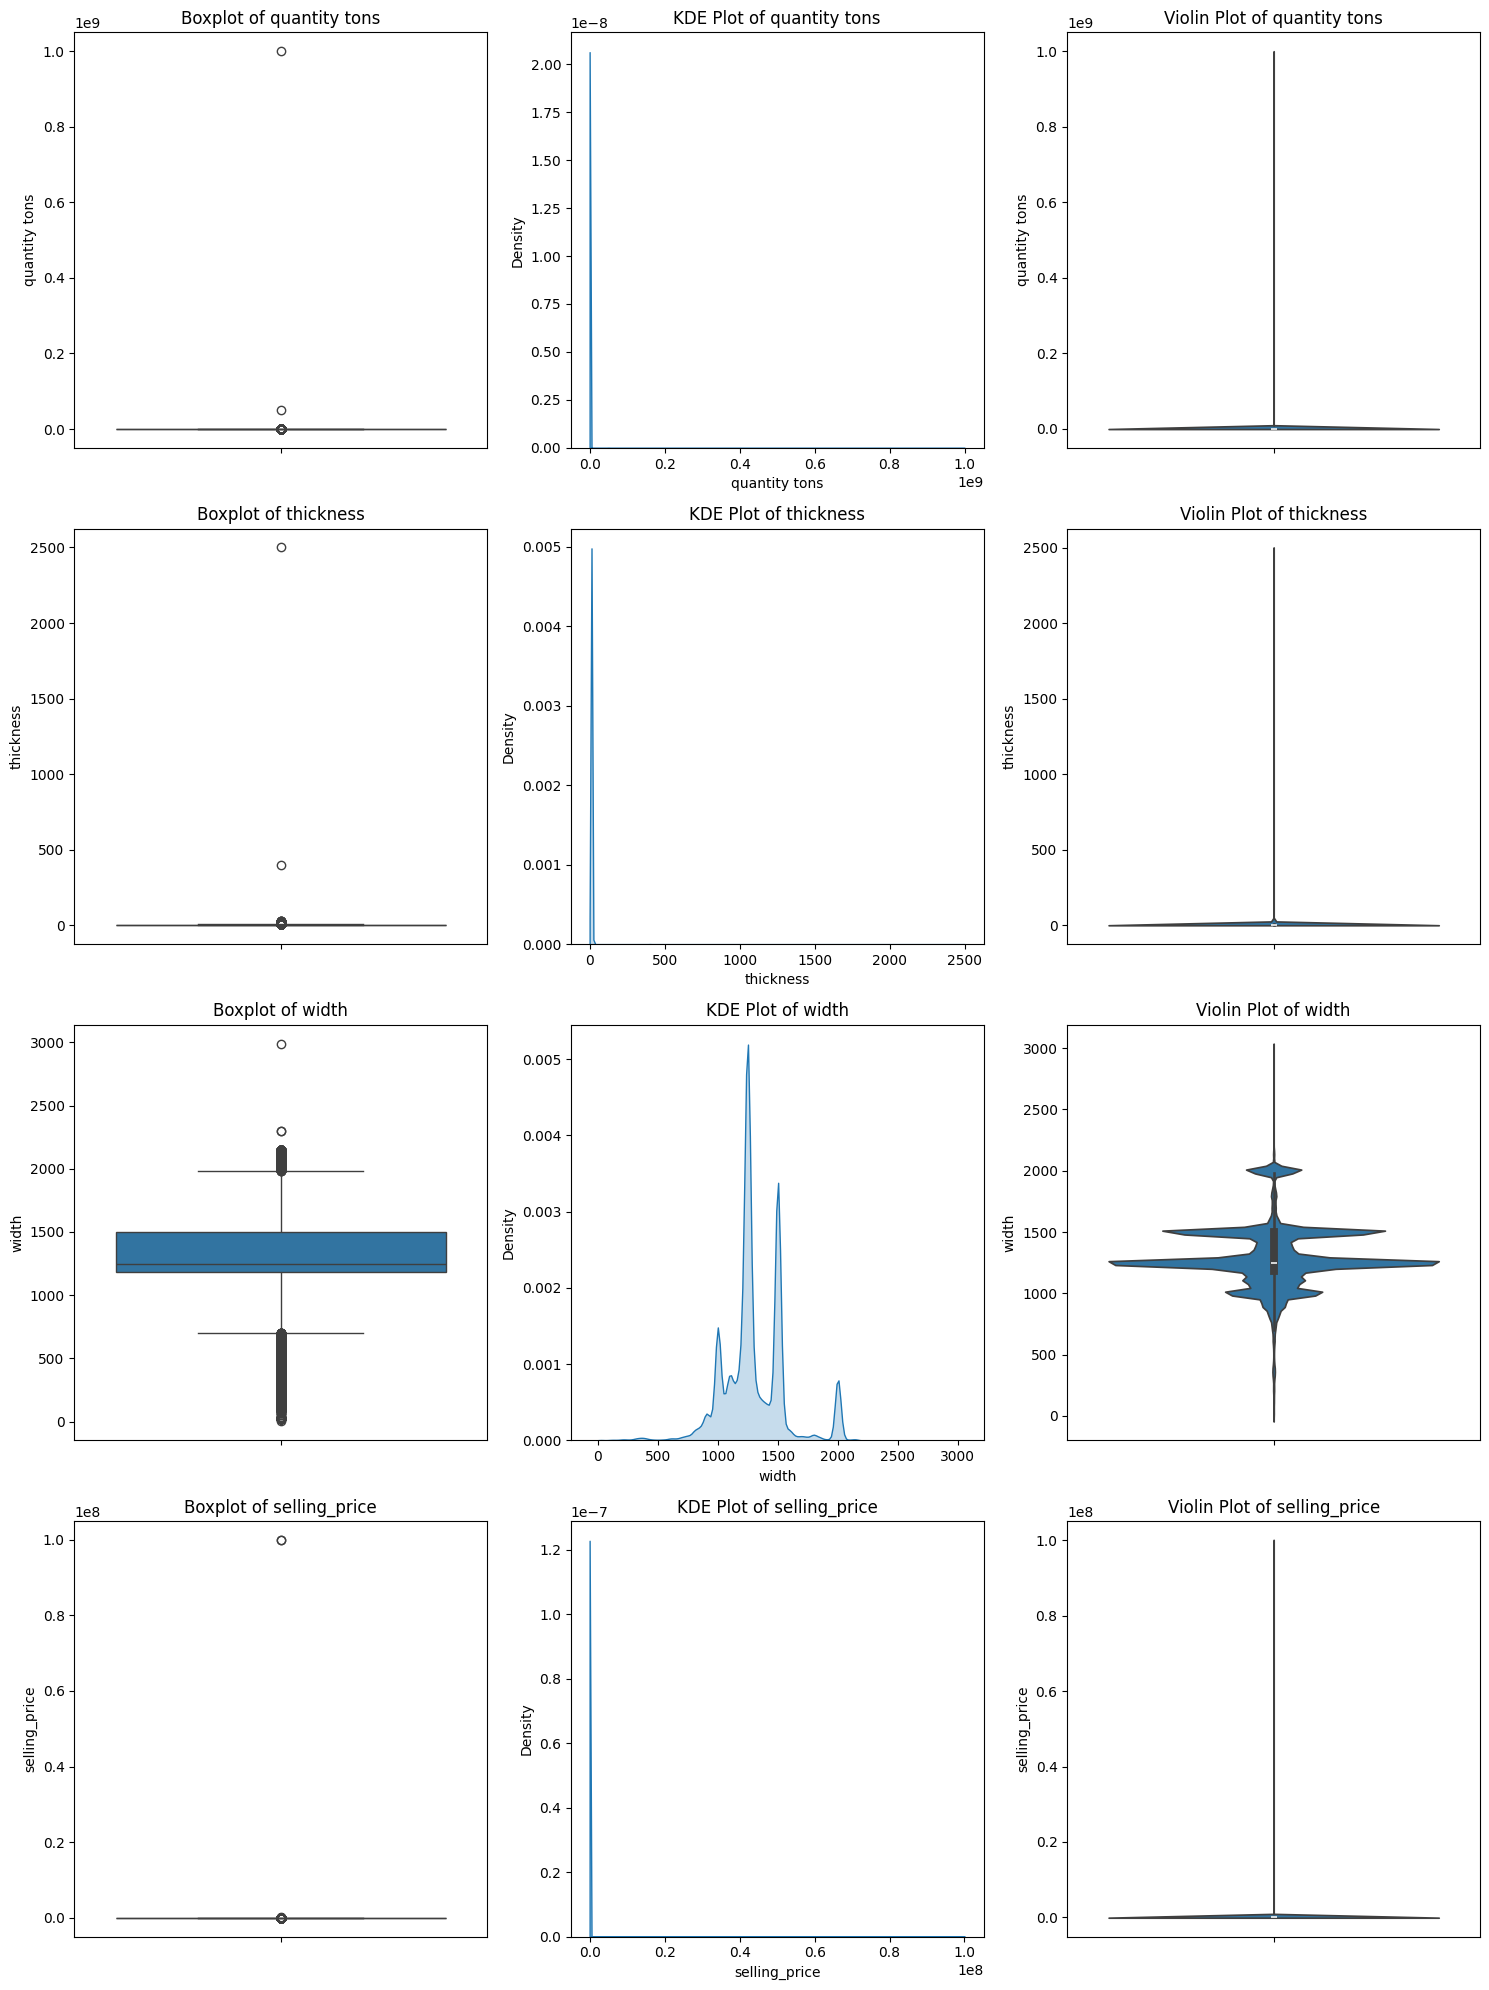

In [83]:
# Visualise the skewness and outliers
import seaborn as sns
import matplotlib.pyplot as plt
# Visualising skewness and outliers
df_numeric_copper = df_copper_data[['quantity tons','thickness','width','selling_price']]
# Create a grid with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
# Loop through each column and plot boxplot, kdeplot, and violinplot
for i, col in enumerate(df_numeric_copper.columns):
    sns.boxplot(y=df_numeric_copper[col], ax=axes[i, 0])
    sns.kdeplot(df_numeric_copper[col], ax=axes[i, 1], fill=True)
    sns.violinplot(y=df_numeric_copper[col], ax=axes[i, 2])

    # Set titles for the plots
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 1].set_title(f'KDE Plot of {col}')
    axes[i, 2].set_title(f'Violin Plot of {col}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [84]:
df_copper_data.describe()

,item_date,quantity tons,thickness,width,delivery date,selling_price
count,181631,1.816310e+05,181631.000000,181631.000000,181631,1.816310e+05
mean,2020-11-26 23:02:26.016924672,5.876231e+03,2.564198,1295.267162,2021-01-25 22:49:03.528362496,1.918367e+03
min,2020-07-02 00:00:00,-2.000000e+03,0.180000,1.000000,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.096801e+01,0.700000,1180.000000,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036395e+01,1.500000,1250.000000,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716187e+01,3.000000,1500.000000,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2500.000000,2990.000000,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349346e+06,6.572637,261.644078,NaN,3.318331e+05


Here, it is observed that the minimum value of quantity tons and selling price are negative which is incorrect. Also, the maximum value of thickness is very big compared to the minimum thereby contributing to the skewness.

In [85]:
A_x = [x for x in df_copper_data['quantity tons'] if x<=0]
# Selling price can't be very small
A_y = [y for y in df_copper_data['selling_price'] if y<=0.1] 
print(A_x)
print(A_y)

[-4.0, -1.4767940502194192, -18.0, -2000.0]
[-1160.0, 0.0, -730.0, -445.0, -25.0, 0.0, 0.1, -336.0]


In [86]:
m1 = df_copper_data['quantity tons'] <= 0
df_copper_data.loc[m1,'quantity tons'] = np.nan
m2 = df_copper_data['selling_price'] <= 0.1
df_copper_data.loc[m2,'selling_price'] = np.nan

In [87]:
df_copper_data.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    8
dtype: int64

In [88]:
# Remove the null values
df_copper_data.dropna(inplace=True)

In [89]:
df_copper_data.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [90]:
# Apply log transformation to quantity tons, thickness and selling_price to address the skewness
for x in ['quantity tons','thickness','selling_price']:
    df_copper_data[x] = np.log(df_copper_data[x])

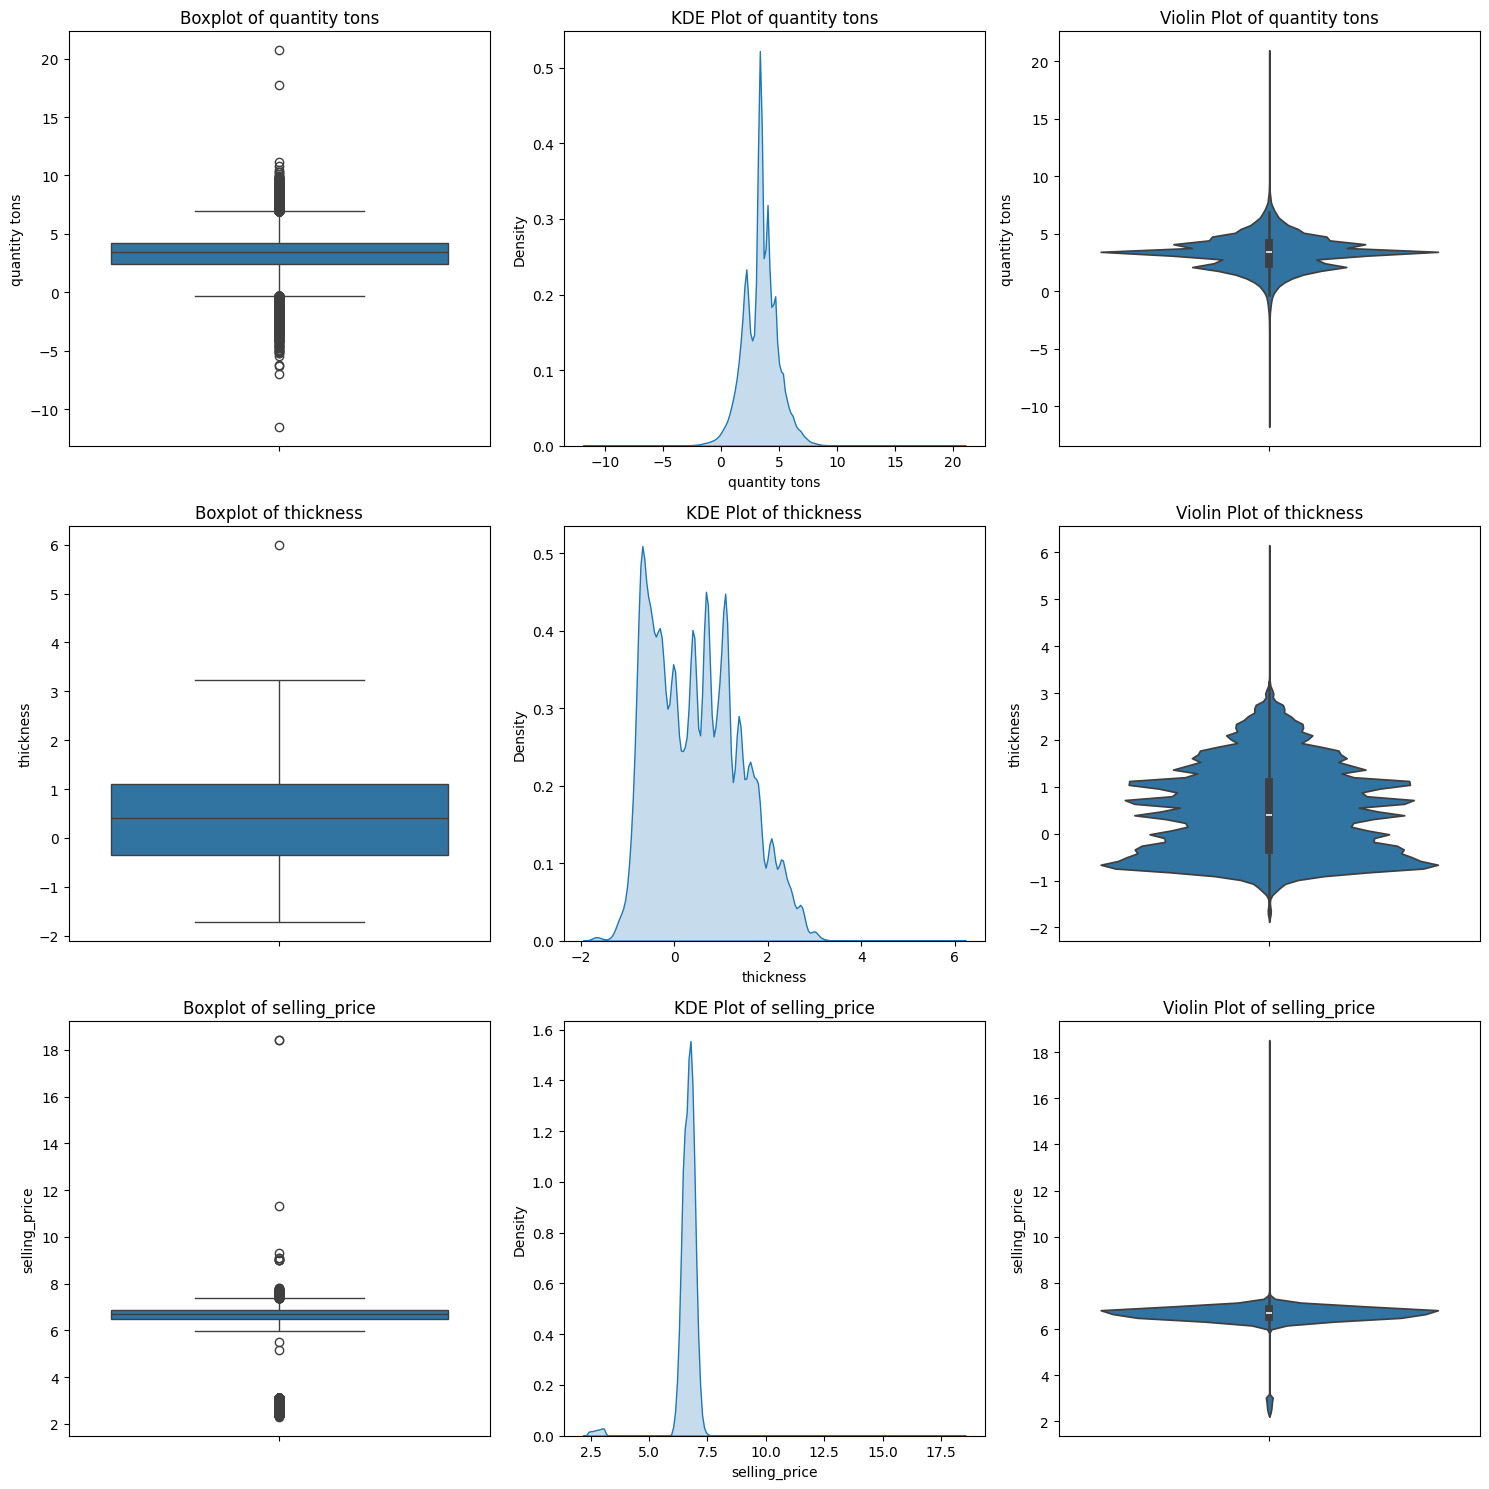

In [91]:
df_numeric_copper = df_copper_data[['quantity tons','thickness','selling_price']]
# Create a grid with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# Loop through each column and plot boxplot, kdeplot, and violinplot
for i, col in enumerate(df_numeric_copper.columns):
    sns.boxplot(y=df_numeric_copper[col], ax=axes[i, 0])
    sns.kdeplot(df_numeric_copper[col], ax=axes[i, 1], fill=True)
    sns.violinplot(y=df_numeric_copper[col], ax=axes[i, 2])

    # Set titles for the plots
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 1].set_title(f'KDE Plot of {col}')
    axes[i, 2].set_title(f'Violin Plot of {col}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [92]:
df_copper_data.reset_index(drop=True,inplace=True)
df_copper_data.to_csv('Copper_Refined.csv',index=False)

In [2]:
import pandas as pd
df_copper_data = pd.read_csv('Copper_Refined.csv',dtype={
 'id':'object',
 'quantity tons':'float64',
 'customer':'object',
 'country':'object',
 'status':'object',
 'item type':'object',
 'application':'object',
 'thickness':'float64',
 'width':'float64',
 'material_ref':'object',
 'product_ref':'object',
 'selling_price':'float64'},parse_dates=['item_date','delivery date'])
df_copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,unknown,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,4.670802,30200854.0,25.0,Won,W,41.0,-0.040822,1240.0,unknown,164141591,2020-07-01,6.400257
181615,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,unknown,164141591,2020-07-01,6.381816
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,unknown,164141591,2020-07-01,6.378426
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,unknown,164141591,2020-07-01,6.428105


## Feature selection
Here, the columns id, customer, material_ref, product_ref are not considered as they represent identifiers,and item_date and delivery date as they're in datetime format.

In [3]:
# split the features into numerical and categorical
df_cop_numeric = df_copper_data[['quantity tons','thickness','width','selling_price']]
df_cop_categ = df_copper_data[['country','status','application','item type']]

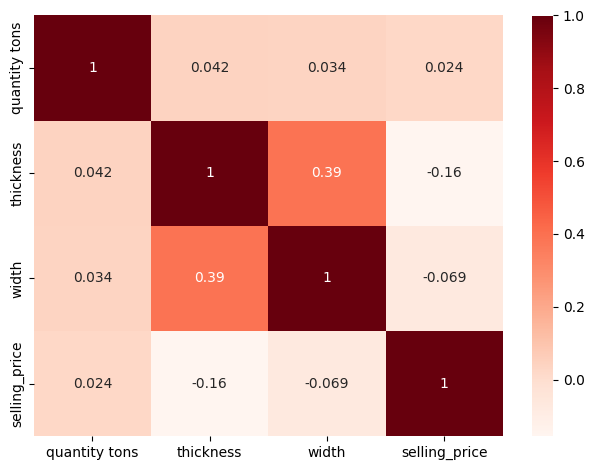

In [4]:
# Correlation is used to compare numerical features
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_cop_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.tight_layout()
plt.show()

In [5]:
# ANOVA to compare numeric and categorical features
from scipy.stats import f_oneway
for cat_var in df_cop_categ.columns:
    for num_var in df_cop_numeric.columns:
        # Group numerical data by the categorical variable
        groups = [group[num_var].values for _, group in df_copper_data.groupby(cat_var)]
        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*groups)
        
        print(f"ANOVA for {num_var} grouped by {cat_var}:")
        print(f"  F-Statistic: {f_stat}")
        print(f"  P-Value: {p_value}")
        print("  Significant?" + (" Yes" if p_value < 0.05 else " No"))
        print("-" * 40)

ANOVA for quantity tons grouped by country:
  F-Statistic: 689.3151203368274
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for thickness grouped by country:
  F-Statistic: 772.7071136629121
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for width grouped by country:
  F-Statistic: 207.59030151761345
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for selling_price grouped by country:
  F-Statistic: 169.17233578013796
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for quantity tons grouped by status:
  F-Statistic: 489.8430018049418
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for thickness grouped by status:
  F-Statistic: 794.390463802753
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for width grouped by status:
  F-Statistic: 328.817177092542
  P-Value: 0.0
  Significant? Yes
----

In [6]:
# Chi-squared test for all categorical variables
# Perform Chi-Squared Test for all pairs
from scipy.stats import chi2_contingency
for i in range(len(df_cop_categ.columns)):
    for j in range(i + 1, len(df_cop_categ.columns)):
        feature1 = df_cop_categ.columns[i]
        feature2 = df_cop_categ.columns[j]
        
        # Create contingency table
        contingency_table = pd.crosstab(df_cop_categ[feature1],df_cop_categ[feature2])
        
        # Perform Chi-Squared Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Print results
        print(f"Chi-Squared Test between {feature1} and {feature2}:")
        print(f"Chi-Squared Statistic: {chi2:.2f}, P-Value: {p:.4f}, Degrees of Freedom: {dof}")
        print()

Chi-Squared Test between country and status:
Chi-Squared Statistic: 35892.32, P-Value: 0.0000, Degrees of Freedom: 128

Chi-Squared Test between country and application:
Chi-Squared Statistic: 125068.45, P-Value: 0.0000, Degrees of Freedom: 464

Chi-Squared Test between country and item type:
Chi-Squared Statistic: 49405.41, P-Value: 0.0000, Degrees of Freedom: 96

Chi-Squared Test between status and application:
Chi-Squared Statistic: 24883.71, P-Value: 0.0000, Degrees of Freedom: 232

Chi-Squared Test between status and item type:
Chi-Squared Statistic: 20888.91, P-Value: 0.0000, Degrees of Freedom: 48

Chi-Squared Test between application and item type:
Chi-Squared Statistic: 61495.92, P-Value: 0.0000, Degrees of Freedom: 174



We see that the numerical features are not highly correlated, the ANOVA test shows a high F-statistic and low p-value for the selected numerical and categorical features, and Chi-squared test shows a high chi-squared statistic and low p-value for the selected categorical features. This infers that the selected features can be used for training ML model.

## Regression Model - Predicting Selling Price

In [7]:
# Encode the categorical variables
categ_cols = df_cop_categ.columns.tolist()
from sklearn.preprocessing import OneHotEncoder
ohe_copper = OneHotEncoder(sparse_output=False)
encoded_labs_cop = ohe_copper.fit_transform(df_copper_data[categ_cols])

In [8]:
cop_encd = pd.DataFrame(encoded_labs_cop,columns=ohe_copper.get_feature_names_out(categ_cols))
cop_encd

,country_107.0,country_113.0,country_25.0,country_26.0,country_27.0,country_28.0,country_30.0,country_32.0,country_38.0,country_39.0,...,application_70.0,application_79.0,application_99.0,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181615,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181616,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181617,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
df_copper_regress = pd.concat([df_cop_numeric,cop_encd],axis=1)
df_copper_regress

,quantity tons,thickness,width,selling_price,country_107.0,country_113.0,country_25.0,country_26.0,country_27.0,country_28.0,...,application_70.0,application_79.0,application_99.0,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,3.991779,0.693147,1500.0,6.749931,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.643822,-0.223144,1210.0,6.953684,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5.956169,-0.967584,952.0,6.468211,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.310301,0.832909,1317.0,6.643790,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6.666354,1.386294,2000.0,6.357842,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,4.670802,-0.040822,1240.0,6.400257,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181615,4.629691,-0.040822,1220.0,6.381816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181616,5.337954,-0.051293,1500.0,6.378426,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181617,1.443523,-0.342490,1250.0,6.428105,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Model Training 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
X = df_copper_regress.drop('selling_price',axis=1)
Y = df_copper_regress['selling_price']
# Normalization
scale = StandardScaler()
X = scale.fit_transform(X.values)
# Splitting the data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider at each split
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Use the best model to predict on the test data
best_rf = grid_search.best_estimator_
Y_pred = best_rf.predict(X_test)

# Evaluate the final model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
print(f"R2 Score: {r2}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (Negative MSE): -0.030317687575837998
Mean Squared Error on Test Data: 0.02741998839825834
R2 Score: 0.9134570294035627


In [11]:
# Predict selling price with the given values
# quantity tons, thickness, width, country, status, application, item type
import numpy as np
X_user = np.array([[np.log(300),np.log(20),800.0,'30.0','Won','28.0','S']])
X_user_oh = ohe_copper.transform(X_user[:,[3,4,5,6]])
X_user1 = np.concatenate((X_user[:,[0,1,2]],X_user_oh),axis=1)
X_user2 = scale.transform(X_user1)
y_pred = best_rf.predict(X_user2)
print(f'Predicted Selling Price:${np.around(np.exp(y_pred[0]),decimals=2)}')

Predicted Selling Price:$681.49


In [12]:
# Pickling to save the models
import pickle
with open('rf_reg.pkl','wb') as reg_file:
    pickle.dump(best_rf,reg_file)
with open('scale.pkl','wb') as scale_f:
    pickle.dump(scale,scale_f)
with open('ohe_cop.pkl','wb') as ohe_f:
    pickle.dump(ohe_copper,ohe_f)

## Classification Model - Predicting Status

In [1]:
import pandas as pd
df_copper_data = pd.read_csv('Copper_Refined.csv',dtype={
 'id':'object',
 'quantity tons':'float64',
 'customer':'object',
 'country':'object',
 'status':'object',
 'item type':'object',
 'application':'object',
 'thickness':'float64',
 'width':'float64',
 'material_ref':'object',
 'product_ref':'object',
 'selling_price':'float64'},parse_dates=['item_date','delivery date'])
df_copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,unknown,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,4.670802,30200854.0,25.0,Won,W,41.0,-0.040822,1240.0,unknown,164141591,2020-07-01,6.400257
181615,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,unknown,164141591,2020-07-01,6.381816
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,unknown,164141591,2020-07-01,6.378426
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,unknown,164141591,2020-07-01,6.428105


In [2]:
# Consider 'Won' or 'Lost' Status
df_copper_class = df_copper_data[df_copper_data.status.isin(['Won','Lost'])]
df_copper_class.reset_index(drop=True,inplace=True)
df_copper_class

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,unknown,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150421,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,4.670802,30200854.0,25.0,Won,W,41.0,-0.040822,1240.0,unknown,164141591,2020-07-01,6.400257
150422,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,unknown,164141591,2020-07-01,6.381816
150423,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,unknown,164141591,2020-07-01,6.378426
150424,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,unknown,164141591,2020-07-01,6.428105


In [3]:
# Check the count of examples with 'Won' and 'Lost' status in the dataset.
won = df_copper_class[['status']][df_copper_class.status=='Won'].count()
lost = df_copper_class[['status']][df_copper_class.status=='Lost'].count()
won = won['status']
lost = lost['status']
round(won/lost,2)

3.37

In [4]:
# Before resampling, let's encode the categorical variables
df_copper_class_num = df_copper_class.select_dtypes(include=['number'])
df_copper_class_categ = df_copper_class[['country','application','item type','status']]

In [5]:
df_copper_class_tr = pd.concat([df_copper_class_num,df_copper_class_categ],axis=1)
df_copper_class_tr

,quantity tons,thickness,width,selling_price,country,application,item type,status
0,3.991779,0.693147,1500.0,6.749931,28.0,10.0,W,Won
1,6.643822,-0.223144,1210.0,6.953684,25.0,41.0,W,Won
2,5.956169,-0.967584,952.0,6.468211,30.0,28.0,WI,Won
3,5.310301,0.832909,1317.0,6.643790,32.0,59.0,S,Won
4,6.666354,1.386294,2000.0,6.357842,28.0,10.0,W,Won
...,...,...,...,...,...,...,...,...
150421,4.670802,-0.040822,1240.0,6.400257,25.0,41.0,W,Won
150422,4.629691,-0.040822,1220.0,6.381816,25.0,41.0,W,Won
150423,5.337954,-0.051293,1500.0,6.378426,25.0,41.0,W,Won
150424,1.443523,-0.342490,1250.0,6.428105,25.0,41.0,W,Won


In [6]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# Encode the categorical variables
categ_cols = df_copper_class_tr.select_dtypes(include='object').columns.tolist()
categ_cols.pop(-1)
ohe_copper_cl = OneHotEncoder(sparse_output=False)
encoded_labs_cop = ohe_copper_cl.fit_transform(df_copper_class_tr[categ_cols])
ordinal = OrdinalEncoder(categories='auto')
encoded_status = ordinal.fit_transform(df_copper_class_tr[['status']])

In [7]:
copcl_encd = pd.DataFrame(encoded_labs_cop,columns=ohe_copper_cl.get_feature_names_out(categ_cols))
copcl_encd

,country_107.0,country_113.0,country_25.0,country_26.0,country_27.0,country_28.0,country_30.0,country_32.0,country_38.0,country_39.0,...,application_70.0,application_79.0,application_99.0,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150423,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df_copper_class_tr['status'] = encoded_status

In [9]:
X = pd.concat([df_copper_class_num,copcl_encd],axis=1)
Y = df_copper_class_tr['status']

In [10]:
# Resample the dataset to ensure 'Won' and 'Lost' are in equal ratios
from collections import Counter
from imblearn.combine import SMOTEENN
print(f'Original: {dict(Counter(Y))}')
smooth = SMOTEENN(random_state=42)
X_samp,Y_samp = smooth.fit_resample(X,Y)
print(f'Resampled: {dict(Counter(Y_samp))}')

Original: {1.0: 115995, 0.0: 34431}
Resampled: {0.0: 94605, 1.0: 87421}


In [11]:
round(94605/87421,2)
# Ratio is close to 1

1.08

In [12]:
# Model training and evaluation
# Extra trees classifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
x = X_samp
y = Y_samp

#Normalize the data
scale_cl = StandardScaler()
x = scale_cl.fit_transform(x.values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Defining ExtraTreesClassifier
extra_tc = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=extra_tc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on the test set using the best model
best_etc = grid_search.best_estimator_
test_accuracy = best_etc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9835736849333884
Test Accuracy: 0.9854144921166841


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18868
         1.0       0.99      0.98      0.98     17538

    accuracy                           0.99     36406
   macro avg       0.99      0.99      0.99     36406
weighted avg       0.99      0.99      0.99     36406



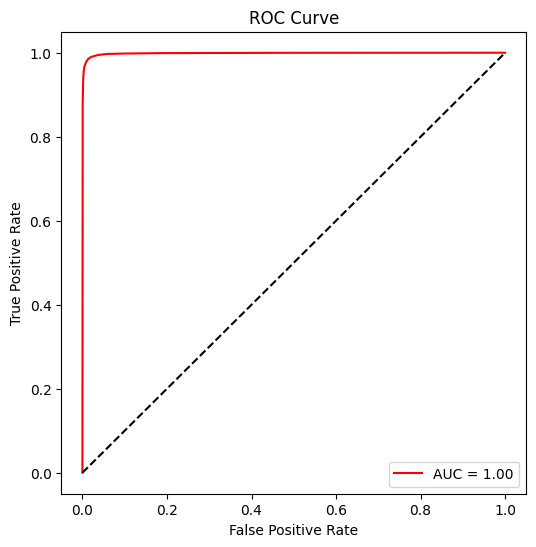

In [14]:
import matplotlib.pyplot as plt
y_pred = best_etc.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
y_pred_prob = best_etc.predict_proba(x_test)[:,1]
# AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}',color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
# Predicting Status with the given values
# quantity tons,thickness,width,selling_price,country,application,item type
import numpy as np
X_val = np.array([[np.log(300),np.log(20),800.0,np.log(681.0),'30.0','28.0','S']])
X_val_oh = ohe_copper_cl.transform(X_val[:,[4,5,6]])
X_val1 = np.concatenate((X_val[:,[0,1,2,3]],X_val_oh),axis=1)
X_val2 = scale_cl.transform(X_val1)
Y_sp = best_etc.predict(X_val2)
if Y_sp == 1:
    print("Status: Won")
else:
    print("Status: Lost")

Status: Lost


In [18]:
# Pickling to save the models
import pickle
with open('classfy_model.pkl','wb') as class_fl:
    pickle.dump(best_etc,class_fl)
with open('ohe_class.pkl','wb') as ohe_clf:
    pickle.dump(ohe_copper_cl,ohe_clf)
with open('scale_class.pkl','wb') as sc_cl:
    pickle.dump(scale_cl,sc_cl)